**掛載雲端硬碟**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**import 套件**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as plt_font
twfont1=plt_font.FontProperties(fname="drive/My Drive/colaDL_CLASS/kaiu.ttf")

**定義多項式**

In [ ]:
def F(x,y):
    return x**2+y**2

**定義導函式**

In [ ]:
def Fx(x,y):
    return 2*x
def Fy(x,y):
    return 2*y

**用梯度下降尋找最小值**

In [ ]:
#設定step_x、step_y用來儲存梯度下降每一步的座標
step_x=[]
step_y=[]
step_z=[]
#設定學習率，可以調大或調小，觀察梯度下降情況
ETA=0.1
#設定梯度下降的起點，可以改變不同位置，觀察梯度下降情況
x_point=-5
y_point=-5
for i in range(100):
    step_x.append(x_point)
    step_y.append(y_point)
    step_z.append(F(x_point,y_point))
    #利用梯度下降，更新x_point和y_point
    x_point=x_point-ETA*Fx(x_point,y_point)
    y_point=y_point-ETA*Fy(x_point,y_point)

**設置網格並畫出下降路徑**

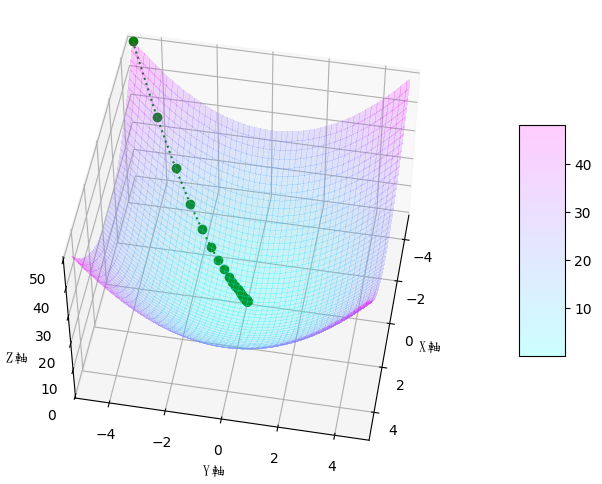

In [ ]:
#產生橫軸、縱軸座標的數據點矩陣(在-5和5之間，間隔0.1)
x=np.arange(-5,5,0.1)
y=np.arange(-5,5,0.1)
#利用橫軸、縱軸座標的數據點鋪設網點
x,y=np.meshgrid(x,y)

#開啟繪圖區域
fig=plt.figure(figsize=(12,6))
#設定為3D繪圖
ax=fig.add_subplot(projection='3d')
#設定坐標軸範圍
ax.set_zlim(0,50)
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
#設定坐標軸說明文字
ax.set_xlabel('X軸',fontproperties=twfont1)
ax.set_ylabel('Y軸',fontproperties=twfont1)
ax.set_zlabel('Z軸',fontproperties=twfont1)
#畫出3D曲面,cmap為數值及色階對應方式,linewidth為線寬,antiliased=Fasle可以加快繪圖速度
surf=ax.plot_surface(x,y,F(x,y),cmap="cool",alpha=0.2,antialiased=False)
# 畫出梯度修正路徑的點和線
ax.plot(step_x,step_y,step_z,"g:o");
# 顯示數值及色階對應方式,shrink設定colorbar長度為圖片高度的幾倍,預設值1.0,aspect設定colorbar寬、高比,預設值20
fig.colorbar(surf,shrink=0.5,aspect=5)
#elev=20設定視線和水平面的夾20度，azim=30設定立體圖順時針旋轉30度
ax.view_init(elev=50,azim=10)